## Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load Dataset

In [2]:
df = pd.read_csv('/content/1701970144008-diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Understanding


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#To know more about the dataset with transpose – here
#T is for the transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Missing Value Check

In [8]:
df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [9]:
#To get the total number of null values in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**There's no Missing Value. Therefore, we must replace the 0 values with NaN and then blame them properly**

In [12]:
#Handling Missing Values
#Replace 0 values with NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
# Showing the count of NaNs
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


We will replace the zeros with NaN values to maintain the dataset’s authenticity and then attribute these missing values to the respective columns’ mean or median.

## Data Visualization

>> Data Distribution Before Imputing Missing Values

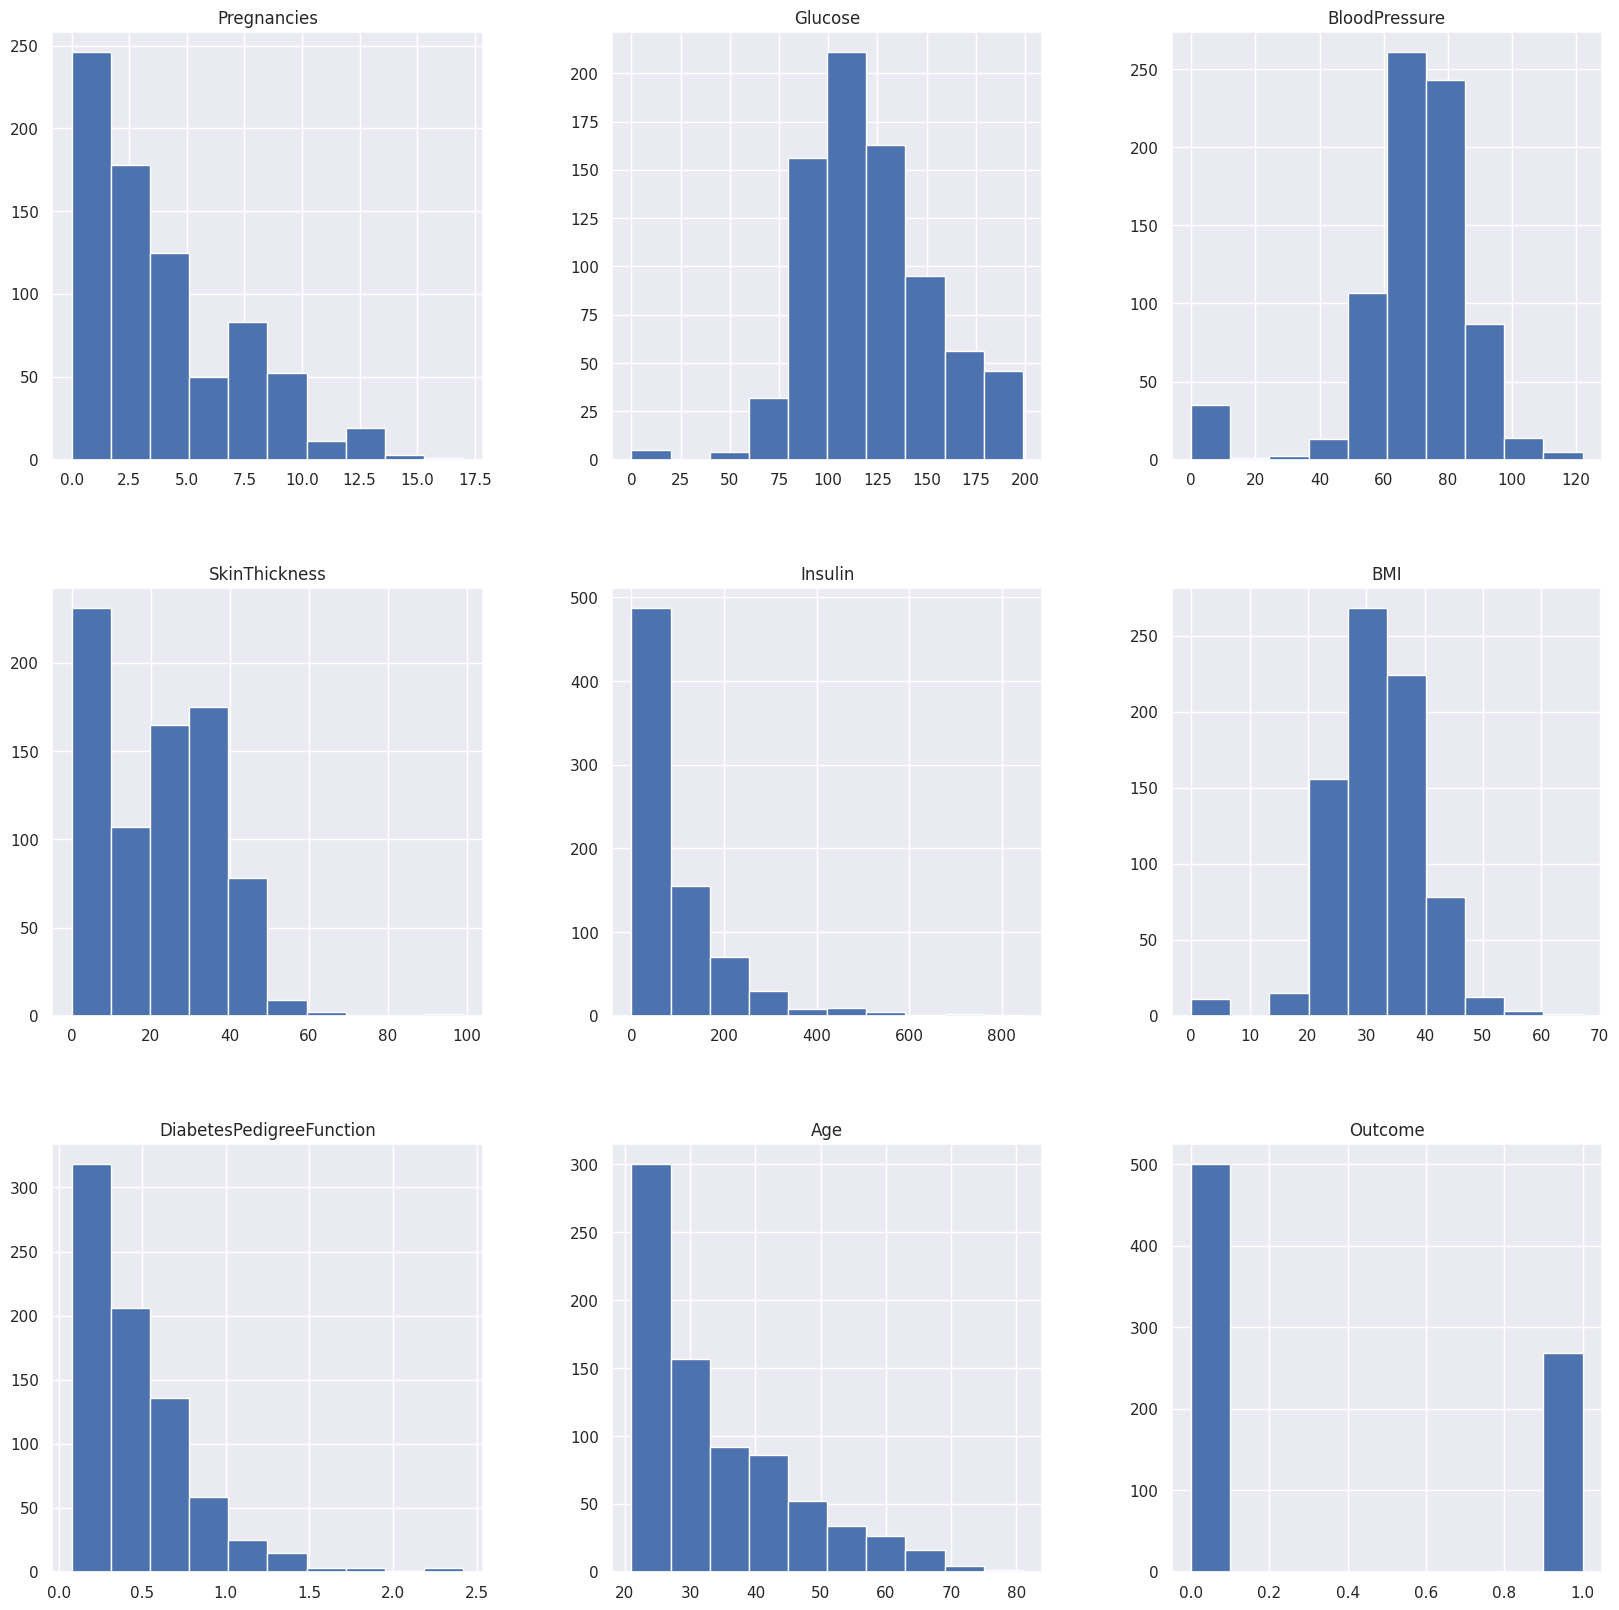

In [13]:
#visualize the distribution of each feature in the dataset before removing null values
diabetes = df.hist(figsize=(20, 20))

**Observation**

We have seen the distribution of each feature, whether dependent or independent. It is the best way to start the dataset analysis as it shows the occurrence of each value in the graphical structure, letting us know the range of the data.

## Imputing Missing Values


In [14]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

>> Data Distribution After Imputing Missing Values

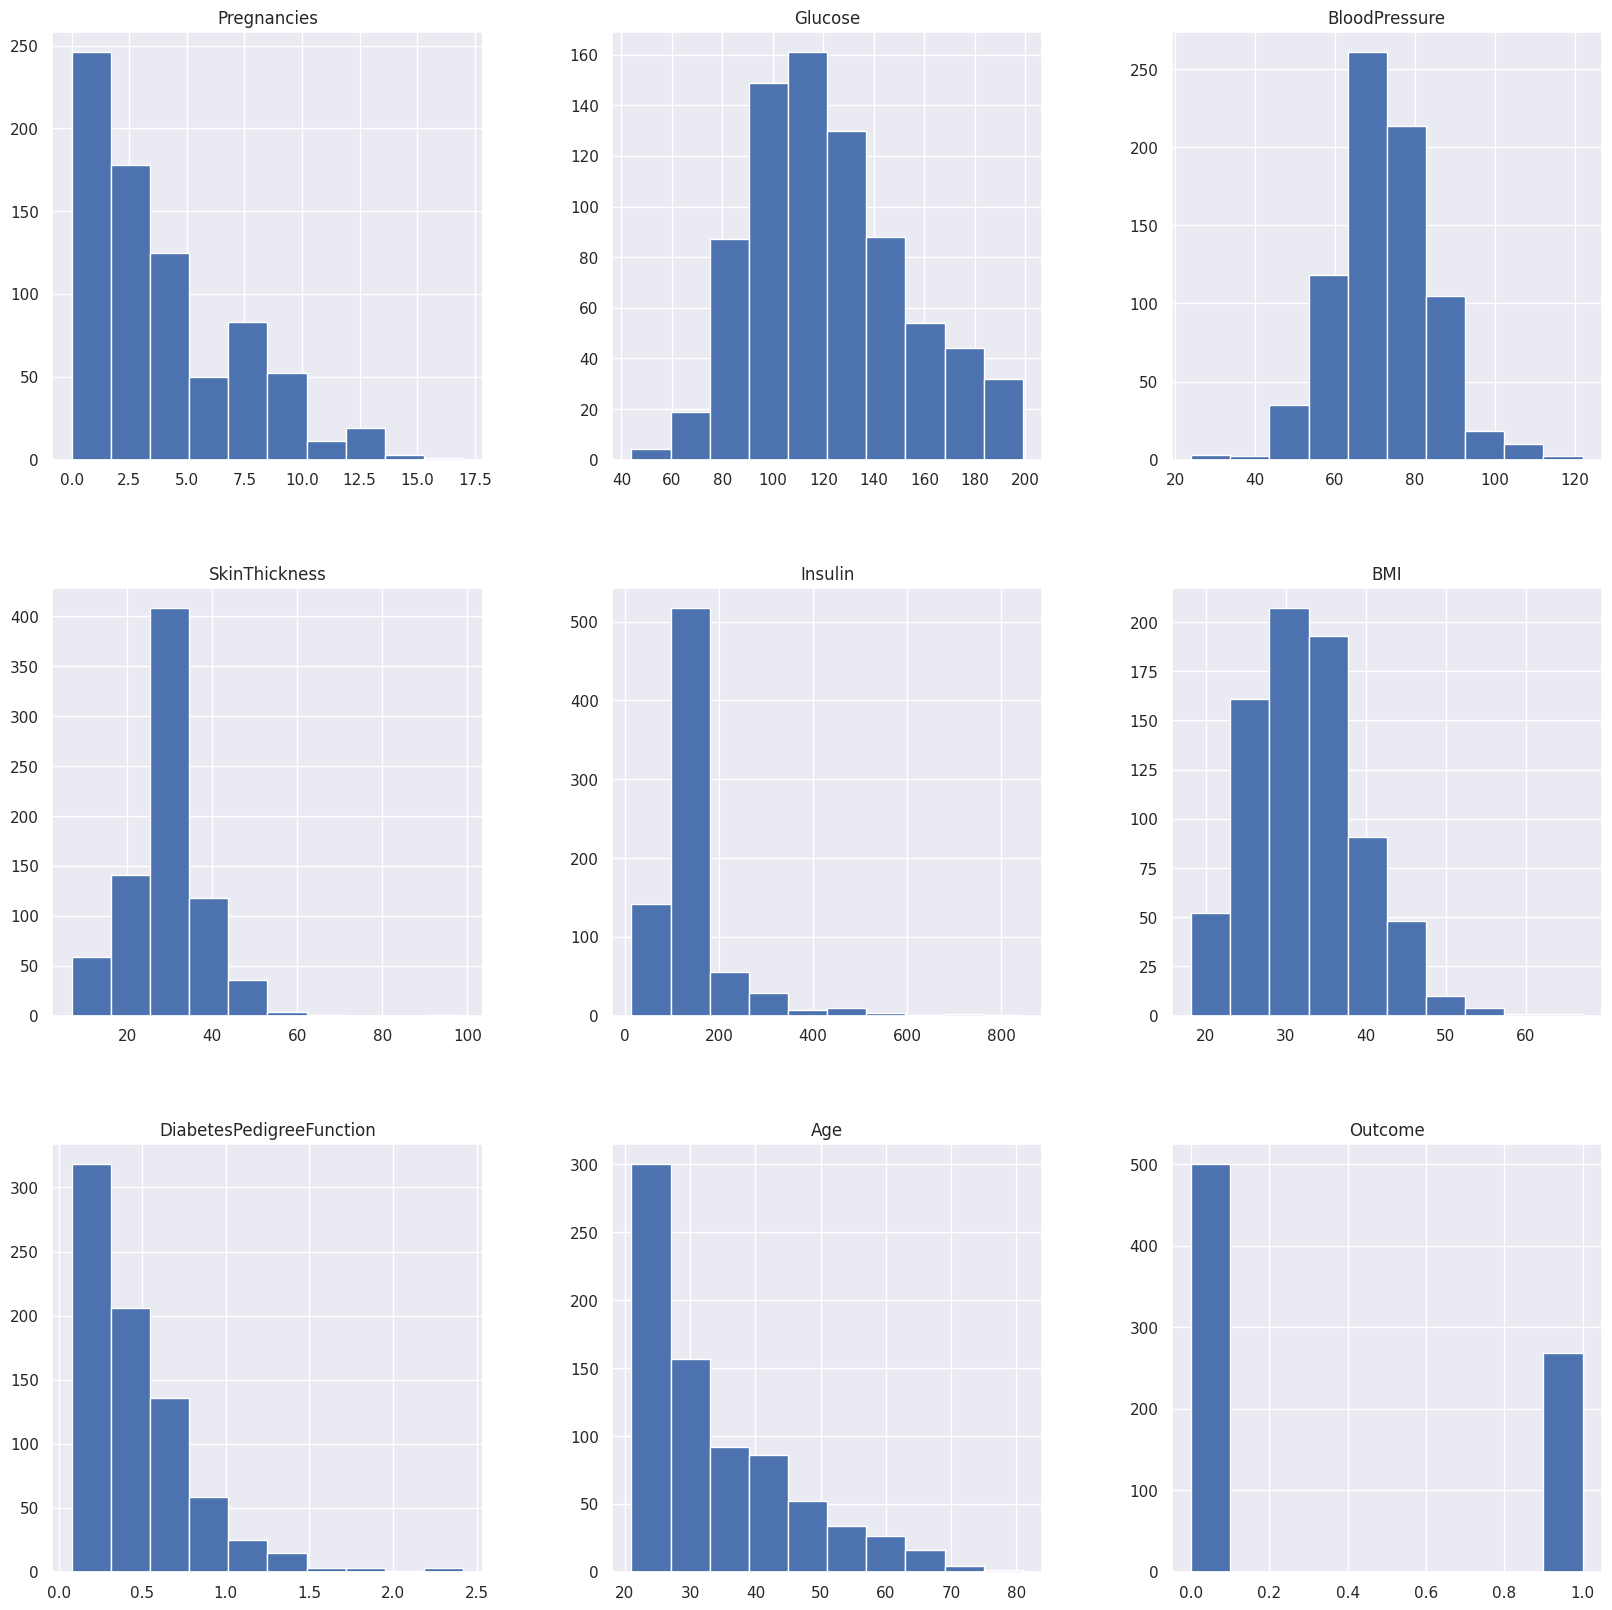

In [15]:
diabetes = df_copy.hist(figsize=(20, 20))

**Observation**

Using this visualization to see the

*   changes that we can see after those null values are removed from the dataset, and we can see the difference.
*   In age column after removal of the null values, we can see that there is a spike at the range of 50 to 100 which is quite logical as well.





## Null Count Analysis

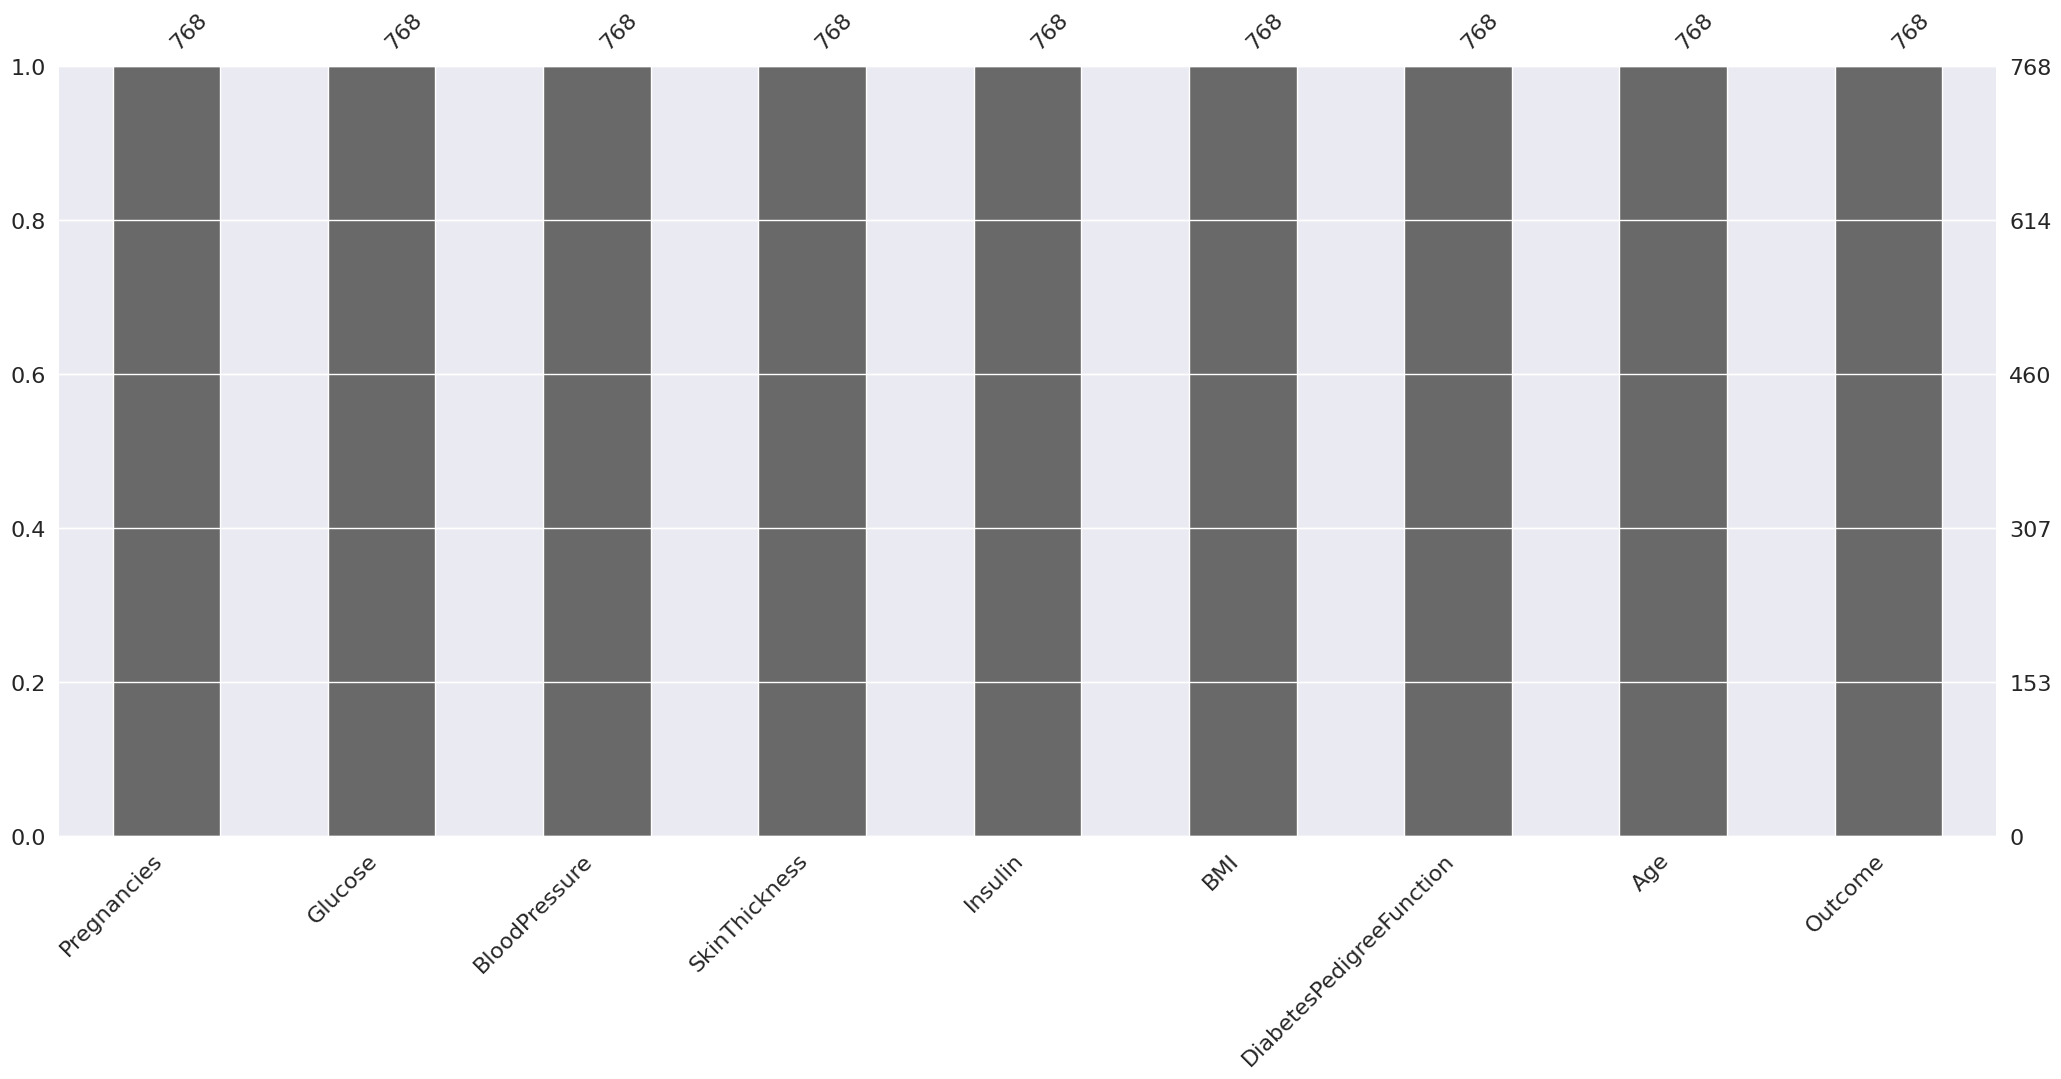

In [17]:
diabetes = msno.bar(df)

Outcome
0    500
1    268
Name: count, dtype: int64


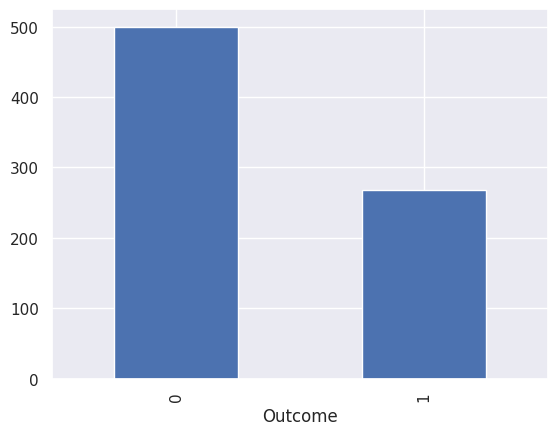

In [18]:
color_wheel = {1: "blue", 2: "green"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p = df.Outcome.value_counts().plot(kind="bar")

**Observation**

*   The above visualization indicates that our training dataset is imbalanced.
*    The number of non-diabetic patients is almost double that of diabetic patients.



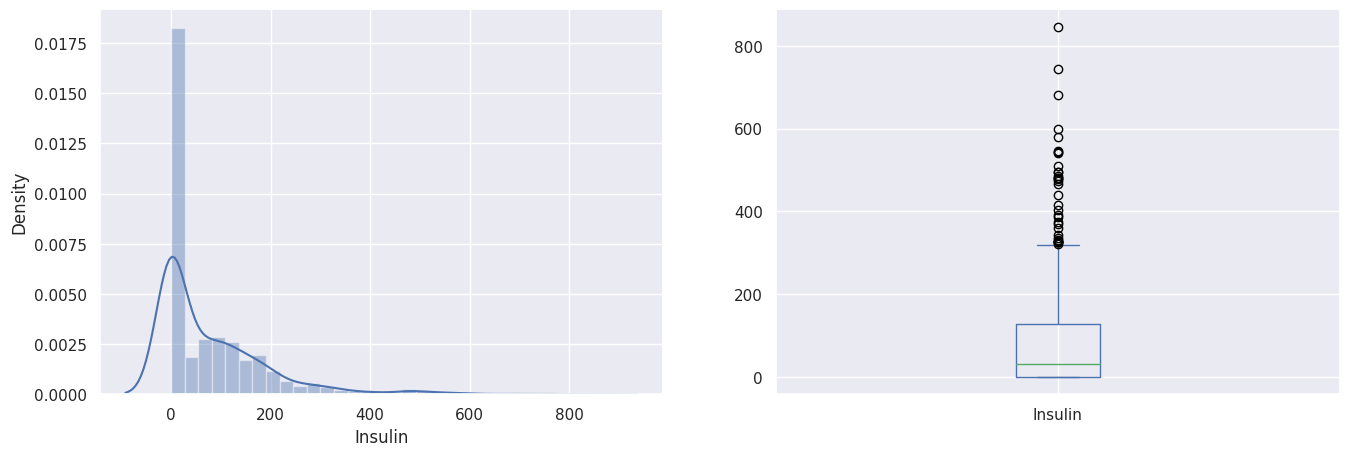

In [20]:
#Distribution and Outliers of Insulin
plt.subplot(121)
sns.distplot(df['Insulin'])
plt.subplot(122)
df['Insulin'].plot.box(figsize=(16, 5))
plt.show()

**Observation**

The distplot helps us understand the distribution of the **Insulin** feature, while the boxplot reveals any outliers present. This combined approach provides a comprehensive view of the data, highlighting any potential issues that need to be addressed during further analysis.

## Analyze Correlation

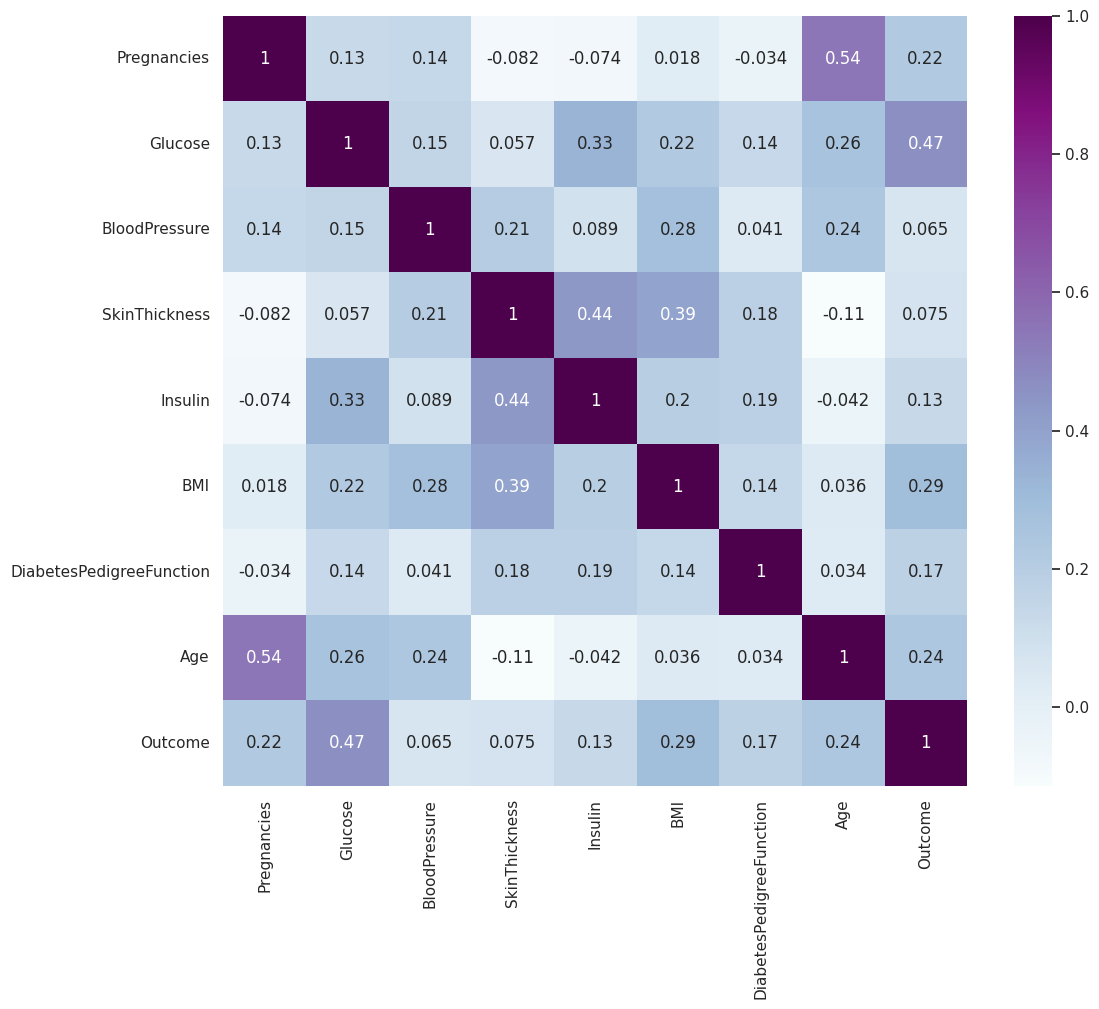

In [23]:
corr_= df.corr()
plt.figure(figsize=(12, 10))
diabetes = sns.heatmap(df.corr(), annot=True, cmap='BuPu')

**Observation**

The heatmap above shows the correlation coefficients between each pair of features in the dataset. The correlation coefficient ranges from -1 to 1, where:

*   1 indicates a perfect positive correlation
*   -1 indicates a perfect negative correlation
*   0 indicates no correlation



## Data Scaling

##Before Scaling

In [24]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## After Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df_copy.drop(['Outcome'], axis=1)),

columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


After scaling, the values of all features are now on the same scale.

In [28]:
#Explore The Target Column
y = df_copy.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**Observation**

The Outcome column shows whether a patient has diabetes 1 or not 0



## Split Data

In [30]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

## Modeling


## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [33]:
#Check the accuracy of the model on the training dataset
rfc_train = rfc.predict(X_train)
from sklearn import metrics
print("Training Accuracy =", format(metrics.accuracy_score(y_train, rfc_train)))

Training Accuracy = 1.0


The model is overfitted on the training data.

In [34]:
predictions = rfc.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, predictions)))

Test Accuracy = 0.7677165354330708


In [36]:
# classification report and confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[138  24]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       162
           1       0.70      0.62      0.66        92

    accuracy                           0.77       254
   macro avg       0.75      0.74      0.74       254
weighted avg       0.76      0.77      0.76       254



## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
# Testing Data

predictions = dtree.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, predictions)))

Test Accuracy = 0.7165354330708661


In [44]:
# classification report and confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[127  35]
 [ 37  55]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       162
           1       0.61      0.60      0.60        92

    accuracy                           0.72       254
   macro avg       0.69      0.69      0.69       254
weighted avg       0.72      0.72      0.72       254



## XgBoost Classifier

In [41]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
# Testing Data

xgb_pred = xgb_model.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, xgb_pred)))

Test Accuracy = 0.7283464566929134


In [43]:
# classification report and confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

[[128  34]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       162
           1       0.63      0.62      0.62        92

    accuracy                           0.73       254
   macro avg       0.71      0.70      0.71       254
weighted avg       0.73      0.73      0.73       254



## SVM (Support Vector Machine)

In [46]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [47]:
# Testing Data

svc_pred = svc_model.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, svc_pred)))

Test Accuracy = 0.7480314960629921


In [48]:
# classification report and confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[145  17]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



**The Best Model**

The Random Forest model performed the best with an accuracy of 0.7677.

## Retrieve the feature importances from the Random Forest model:

In [49]:
rfc.feature_importances_

array([0.08090698, 0.25841106, 0.09049822, 0.07312285, 0.06920089,
       0.16664891, 0.12451927, 0.13669181])

**Observation**

From the above output, it’s not very clear which feature is most important. Therefore will create a visualization to better understand the feature’s importance.

<Axes: >

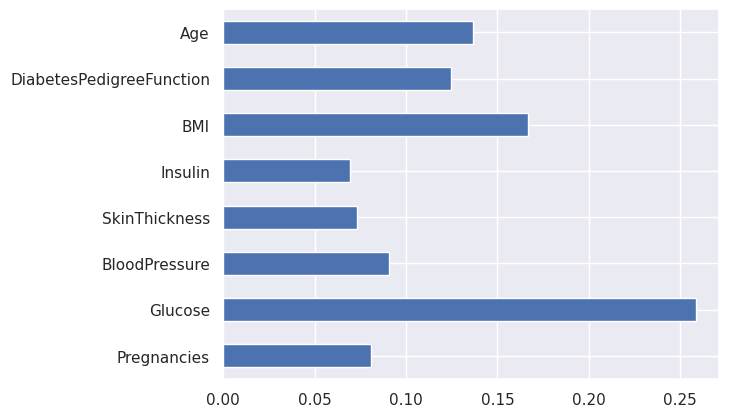

In [51]:
# Plot The Feature

pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh')

**Observation**

From the graph above, `Glucose`  is the most essential feature in this dataset. Visualizing feature importance helps us identify which features influence the model’s predictions most.

In [54]:
# Saving Model _ Random Forest

import pickle

saved_model = pickle.dumps(rfc)
rfc_from_pickle = pickle.loads(saved_model)
rfc_from_pickle.predict(X_test)

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [55]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Analyze diabetes or not with adding data points to the model will either return 0 or 1

In [60]:
#4th Patient

rfc.predict([[0, 137, 40, 35, 168, 43.1, 2.228, 33]])


array([1])

This Patient has Diabetes

In [59]:
#765th Patient
rfc.predict([[5, 121, 72, 23, 112, 26.2, 0.245, 30]])

array([0])

This Patient Doesn't have Diabetes